<a href="https://colab.research.google.com/github/WillianXG/Projeto_Em_grupo-Modulo-3/blob/main/grupoModulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação das bibliotecas

In [1]:
%pip install pymongo
!pip install psycopg2-binary


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.4 MB/s eta 0:00:00


# Dados Criptomoedas

In [20]:
import pandas as pd
import statistics
from datetime import datetime
import datetime as dt
import requests
from matplotlib import pyplot as plt
import seaborn as sns

#Importando csv do github
aave = pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Aave.csv')
binance=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_BinanceCoin.csv')
bitcoin=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Bitcoin.csv')
cardano=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Cardano.csv')
chainlink=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_ChainLink.csv')
cosmos=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Cosmos.csv')
cryptocom=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_CryptocomCoin.csv')
dogecoin=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Dogecoin.csv')
eos=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_EOS.csv')
ethereum=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Ethereum.csv')
iota=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Iota.csv')
litecoin=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Litecoin.csv')
monero=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Monero.csv')
nem=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_NEM.csv')
polkadot=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Polkadot.csv')
solana=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Solana.csv')
stellar=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Stellar.csv')
tether=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Tether.csv')
tron=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Tron.csv')
usd=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_USDCoin.csv')
uniswap=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Uniswap.csv')
wrappedBitcoin=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_WrappedBitcoin.csv')
xrp=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_XRP.csv')
#Unificando todos os dataframe
criptomoedas=[aave, binance, bitcoin, cardano, chainlink, cosmos, cryptocom, dogecoin, eos, ethereum, iota, litecoin, monero, nem, polkadot, solana, stellar, tether, tron, usd, uniswap, wrappedBitcoin, xrp]

#Acessando Banco de Dados


#sample_mflix
#9tZcQx6HNn25cV3x
#mongodb://atlas-sql-667a3e2553e9a557d129553e-b6nsa.a.query.mongodb.net/sample_mflix?ssl=true&authSource=admin

#Funções
def data_process(df):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])  # Remover linhas com datas inválidas
    df['Year'] = df['Date'].dt.year
    return df

def calculate_annual(df):
    df_grouped = df.groupby('Year')['Close'].agg(['first', 'last'])
    df_grouped['Change'] = (df_grouped['last'] - df_grouped['first']) / df_grouped['first']
    df_grouped = df_grouped.rename(columns={'first': 'Primeira', 'last': 'Última', 'Change': 'Diferença'})
    return df_grouped

def find_extremes(df):
    max_val_year = df['Diferença'].idxmax()
    min_val_year = df['Diferença'].idxmin()
    return max_val_year, df.loc[max_val_year, 'Diferença'], min_val_year, df.loc[min_val_year, 'Diferença']
def calc_valv():
  for indice, crypto in enumerate(criptomoedas):
        max_year, max_change, min_year, min_change = extremes[indice]
        df = pd.DataFrame({
            'Criptomoeda': [crypto['Name'][0]],
            'Melhor Ano': [max_year],
            'Maior valorização': [max_change],
            'Pior Ano': [min_year],
            'Menor valorizaçao': [min_change]
        })
        result_dataframes.append(df)
  return result_dataframes
def concat_valv():
  for crypto in result_dataframes:
    df = pd.concat(result_dataframes, ignore_index=True)
    df = pd.DataFrame(df)
  return df

def calculandoMedia(criptomoedas):
  # Lista para armazenar os valores médios de cada criptomoeda
    medias = {
        'Name': [],
        'High': [],
        'Low': [],
        'Open': [],
        'Close': [],
        'Volume': [],
        'Marketcap': []
    }

    # Itera sobre cada criptomoeda e calcula a média de seus valores
    for criptomoeda in criptomoedas:
        medias['Name'].append(statistics.mode(criptomoeda['Name']))
        medias['High'].append(pd.Series(criptomoeda['High']).mean())
        medias['Low'].append(pd.Series(criptomoeda['Low']).mean())
        medias['Open'].append(pd.Series(criptomoeda['Open']).mean())
        medias['Close'].append(pd.Series(criptomoeda['Close']).mean())
        medias['Volume'].append(pd.Series(criptomoeda['Volume']).mean())
        medias['Marketcap'].append(pd.Series(criptomoeda['Marketcap']).mean())

    # Converte a lista de médias em um DataFrame
    df_medias = pd.DataFrame(medias)

    return df_medias

def diasSemana(criptomoedas):
    dias = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
    criptomoedas_com_dia_semana = []
    for criptomoeda in criptomoedas:
        criptomoeda_com_dia_semana = criptomoeda.copy()  # Criar uma cópia do DataFrame original
        nomes_dias_semana_criptomoeda = []
        for index, row in criptomoeda.iterrows():  # Iterar sobre todas as linhas
            data = row['Date']  # Obter a data
            dia_semana = dias[data.weekday()]  # Obter o nome do dia da semana
            nomes_dias_semana_criptomoeda.append(dia_semana)
        # Adicionar a lista de nomes dos dias da semana como uma nova coluna no DataFrame
        criptomoeda_com_dia_semana['Dia da Semana'] = nomes_dias_semana_criptomoeda
        criptomoedas_com_dia_semana.append(criptomoeda_com_dia_semana)
    return criptomoedas_com_dia_semana

def calculandoTendencia(criptomoedas):
    resultados = []

    for criptomoeda in criptomoedas:
        name = criptomoeda['Name'].iloc[0]  # Obtém o nome da criptomoeda

        # Calcula a diferença entre os preços de fechamento consecutivos
        criptomoeda['Diferença'] = criptomoeda['Close'].diff()

        # Calcula as médias de cada coluna numérica
        media = {
            'Open': criptomoeda['Open'].mean(),
            'Close': criptomoeda['Close'].mean(),
            'High': criptomoeda['High'].mean(),
            'Low': criptomoeda['Low'].mean(),
            'Volume': criptomoeda['Volume'].mean(),
            'Marketcap': criptomoeda['Marketcap'].mean()
        }

        # Calcula a tendência geral para esta criptomoeda usando mode
        tendencia_geral = statistics.mode(criptomoeda['Diferença'].apply(lambda x: '1' if x > 0 else ('0' if x < 0 else '-')))

        # Adiciona a tendência geral e as médias ao resultado
        resultados.append({
            'Name': name,
            'Média Open': media['Open'],
            'Média Close': media['Close'],
            'Média High': media['High'],
            'Média Low': media['Low'],
            'Média Volume': media['Volume'],
            'Média Marketcap': media['Marketcap'],
            'Tendência Geral': tendencia_geral
        })

        # Remove a coluna de diferença, se necessário
        criptomoeda.drop(columns=['Diferença'], inplace=True)

    # Retorna o resultado final como DataFrame
    return pd.DataFrame(resultados)

def calcular_media_por_dia_da_semana(criptomoedas):
    dias = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
    medias_por_dia_da_semana = {dia: [] for dia in dias}
    nomes_criptomoedas = []

    for criptomoeda in criptomoedas:
        # Supondo que a coluna 'Name' está presente no DataFrame e contém o mesmo nome para todas as entradas
        name = statistics.mode(criptomoeda['Name'])
        nomes_criptomoedas.append(name)
        for dia in dias:
            # Filtrar os dados para o dia da semana atual
            dados_do_dia = criptomoeda[criptomoeda['Dia da Semana'] == dia]
            # Calcular a média dos valores de fechamento para o dia da semana atual
            media = dados_do_dia['Close'].mean()
            medias_por_dia_da_semana[dia].append(media)

    # Criar DataFrame com as médias por dia da semana
    df_medias = pd.DataFrame(medias_por_dia_da_semana)
    df_medias.insert(0, 'Nome da Criptomoeda', nomes_criptomoedas)

    return df_medias
def rank_criptomoedas_por_valorizacao(criptomoedas):
    # Processar os dados
    criptomoedas_processadas = [data_process(df) for df in criptomoedas]

    # Calcular variação anual para cada criptomoeda
    variacoes_anuais = [calculate_annual(df) for df in criptomoedas_processadas]

    # Encontrar o ano com a maior variação para cada criptomoeda
    max_variacoes = [max(variacao['Diferença']) for variacao in variacoes_anuais]

    # Criar um DataFrame com os resultados
    df_ranking = pd.DataFrame({
        'Criptomoeda': [df['Name'][0] for df in criptomoedas],
        'Maior Variação Anual': max_variacoes
    })

    # Ordenar o DataFrame pelo valor da maior variação anual
    df_ranking = df_ranking.sort_values(by='Maior Variação Anual', ascending=False)

    # Adicionar uma coluna numerada para o ranking
    df_ranking['Rank'] = range(1, len(df_ranking) + 1)

    return df_ranking

def calcular_media_volume_diario(criptomoedas):
    medias_volume_diario = []
    for criptomoeda in criptomoedas:
        media_volume = criptomoeda['Volume'].mean()
        medias_volume_diario.append(media_volume)

    df_medias_volume = pd.DataFrame({
        'Criptomoeda': [df['Name'][0] for df in criptomoedas],
        'Média Volume Diário': medias_volume_diario
    })

    return df_medias_volume

def calcular_media_valor_mercado(criptomoedas):
    medias_valor_mercado = []
    for criptomoeda in criptomoedas:
        media_valor_mercado = criptomoeda['Marketcap'].mean()
        medias_valor_mercado.append(media_valor_mercado)

    # Criar DataFrame com os resultados
    df_medias_valor_mercado = pd.DataFrame({
        'Criptomoeda': [df['Name'][0] for df in criptomoedas],
        'Média de Valor de Mercado': medias_valor_mercado
    })

    # Ordenar o DataFrame pelo valor da média de valor de mercado
    df_medias_valor_mercado = df_medias_valor_mercado.sort_values(by='Média de Valor de Mercado', ascending=False)

    return df_medias_valor_mercado


def calcular_correlacao_criptomoedas(criptomoedas):
    for i, df in enumerate(criptomoedas):
        if not {'Date', 'Close'}.issubset(df.columns):
            raise ValueError(f"O DataFrame {i} da lista deve conter as colunas 'Date' e 'Close'")

    close_prices = {}

    for df in criptomoedas:
        nome_criptomoeda = df['Name'].iloc[0]

        close_prices[nome_criptomoeda] = df.set_index('Date')['Close'].rename(nome_criptomoeda)

    concatenated_df = pd.DataFrame(close_prices)

    correlation_matrix = concatenated_df.corr()

    return correlation_matrix

# Função para inserir dataframe no MongoDB
def insert_dataframe(df, collection_name):
    collection = db[collection_name]
    collection.delete_many({})  # Limpa a coleção antes de inserir novos dados
    collection.insert_many(df.to_dict('records'))


# Limpeza de Dados


In [3]:
criptomoedaMedia=[]
for indice, criptomoeda in enumerate(criptomoedas):
  criptomoeda=criptomoeda.drop(['SNo'],axis=1)
  criptomoeda['Date'] = pd.to_datetime(criptomoeda['Date'])
  # Corrigindo possíveis
  # 1. Verificar valores ausentes
  valoresEncontrados = criptomoeda.isnull().sum()
  # Exibindo valores nulos
  # print("\nValores Nulos:\n", valoresEncontrados[valoresEncontrados > 0]) if valoresEncontrados.any() else print("Nenhum valor nulo encontrado.")
  # 2. Verificar erros de tipo de dados na coluna 'Date'
  tipo = pd.DataFrame(criptomoeda.dtypes)
  #   # Exibindo tipos antes da correção
  # print(tipo)
  tipo = pd.DataFrame(criptomoeda.dtypes)
  criptomoeda = criptomoeda.astype({col: 'string' for col in criptomoeda.select_dtypes(include='object').columns})
  # # Exibindo tipos pós correção
  # print('\n\n\n')
  # print(criptomoeda['Name'][0])
  # tipo = pd.DataFrame(criptomoeda.dtypes)
  # print(tipo)
  # print('\n\n\n')
  #3. Verificar duplicatas
  # duplicatas = criptomoeda.duplicated().sum()
  # print(duplicatas)
  # if duplicatas > 0:
  #      criptomoeda=criptomoeda.drop_duplicates()
  #      print("\nDuplicate Rows Found: ", duplicatas)
  # else: print("Sem Colunas duplicadas.")
  # duplicatas = criptomoeda.duplicated().sum()
  # print(f'Depois de corrigir \n\n{duplicatas}')
  # if duplicatas > 0:
  #      print("\nDuplicate Rows Found: ", duplicatas)
  # else: print("Sem Colunas duplicadas.")
  criptomoeda.fillna(0)
  # # 4. (Opcional) Verificar outliers na coluna 'Close'
  # if 'Close' in criptomoeda.columns:
  #     q1 = criptomoeda['Close'].quantile(0.25)
  #     q3 = criptomoeda['Close'].quantile(0.75)
  #     iqr = q3 - q1
  #     lower_bound = q1 - 1.5 * iqr
  #     upper_bound = q3 + 1.5 * iqr
  #     outliers = criptomoeda[(criptomoeda['Close'] < lower_bound) | (criptomoeda['Close'] > upper_bound)]
  #     if not outliers.empty:
  #         print("\nOutliers Found:\n", outliers[['Date', 'Close']]
  # Corrigir os problemas encontrado
  # Remover linhas onde a data não pôde ser convertida
  #criptomoeda = criptomoeda.dropna(subset=['Date']
  # Preencher valores ausentes


#1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?

In [21]:
calculandoTendencia(criptomoedas)

tendencia = pd.DataFrame(calculandoTendencia(criptomoedas))

df = tendencia
df['Tendência Geral'] = df['Tendência Geral'].astype(int)
df

,Name,Média Open,Média Close,Média High,Média Low,Média Volume,Média Marketcap,Tendência Geral
0,Aave,254.506688,255.525845,271.306751,237.736035,5.023421e+08,3.168639e+09,1
1,Binance Coin,52.028231,52.250308,54.764100,49.165813,6.269804e+08,7.835575e+09,1
2,Bitcoin,6700.146240,6711.290443,6893.326038,6486.009539,1.090633e+10,1.208761e+11,1
3,Cardano,0.255287,0.256313,0.269807,0.239710,8.934183e+08,7.603454e+09,1
4,Chainlink,6.294481,6.308583,6.633357,5.920968,6.923608e+08,2.494642e+09,1
5,Cosmos,6.759896,6.768099,7.141688,6.367329,2.963413e+08,1.332950e+09,1
6,Crypto.com Coin,0.081802,0.081912,0.085467,0.078565,5.003678e+07,1.485326e+09,1
7,Dogecoin,0.013669,0.013763,0.014964,0.012402,4.326321e+08,1.760533e+09,0
8,EOS,4.623294,4.624088,4.839459,4.384314,1.888406e+09,3.941338e+09,0
9,Ethereum,382.879899,383.910691,398.258568,365.592589,7.057058e+09,4.172084e+10,1


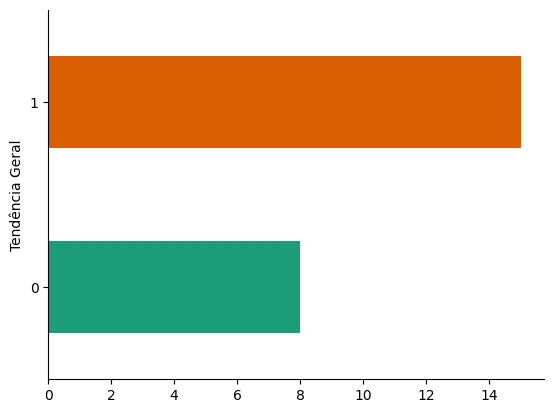

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
tendencia.groupby('Tendência Geral').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

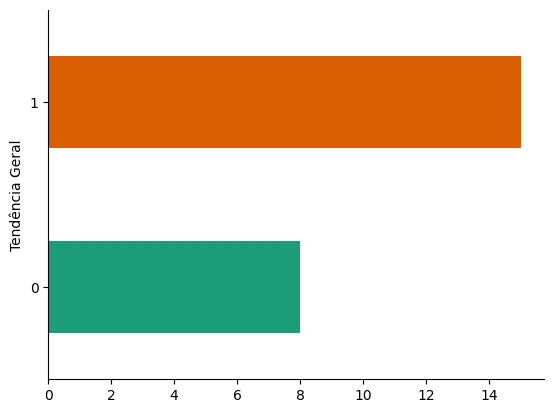

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
tendencia.groupby('Tendência Geral').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#2. Quais os valores médios para todas as criptomoedas?

In [7]:
calculandoMedia = calculandoMedia(criptomoedas)

calculandoMedia

,Name,High,Low,Open,Close,Volume,Marketcap
0,Aave,271.306751,237.736035,254.506688,255.525845,5.023421e+08,3.168639e+09
1,Binance Coin,54.764100,49.165813,52.028231,52.250308,6.269804e+08,7.835575e+09
2,Bitcoin,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
3,Cardano,0.269807,0.239710,0.255287,0.256313,8.934183e+08,7.603454e+09
4,Chainlink,6.633357,5.920968,6.294481,6.308583,6.923608e+08,2.494642e+09
5,Cosmos,7.141688,6.367329,6.759896,6.768099,2.963413e+08,1.332950e+09
6,Crypto.com Coin,0.085467,0.078565,0.081802,0.081912,5.003678e+07,1.485326e+09
7,Dogecoin,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09
8,EOS,4.839459,4.384314,4.623294,4.624088,1.888406e+09,3.941338e+09
9,Ethereum,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10


#3. Em quais anos houve maiores quedas e valorizações?

In [8]:
criptomoedas = [data_process(df) for df in criptomoedas]
annual_changes = [calculate_annual(df) for df in criptomoedas]
extremes = [find_extremes(df) for df in annual_changes]
result_dataframes=[]
calc_valv()
quedas_valo = concat_valv()
quedas_valo

,Criptomoeda,Melhor Ano,Maior valorização,Pior Ano,Menor valorizaçao
0,Aave,2021,2.507467,2020,0.644659
1,Binance Coin,2017,81.135673,2018,-0.267378
2,Bitcoin,2017,13.180152,2018,-0.725954
3,Cardano,2017,26.753375,2018,-0.943646
4,Chainlink,2020,5.238396,2018,-0.605427
5,Cosmos,2021,1.242353,2019,-0.438097
6,Crypto.com Coin,2021,1.061801,2018,0.181833
7,Dogecoin,2021,40.235428,2018,-0.736714
8,EOS,2017,2.234608,2018,-0.709728
9,Ethereum,2017,91.594245,2018,-0.827387


#4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

In [9]:
calcular_media_por_dia_da_semana = calcular_media_por_dia_da_semana(diasSemana(criptomoedas))

#5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?

In [10]:
rank =rank_criptomoedas_por_valorizacao(criptomoedas)
print(rank.iloc[0])

moedaMaisInteressante = rank.head(10)

moedaMaisInteressante

Criptomoeda                    XRP
Maior Variação Anual    360.250574
Rank                             1
Name: 22, dtype: object


,Criptomoeda,Maior Variação Anual,Rank
22,XRP,360.250574,1
13,NEM,299.574088,2
16,Stellar,144.399885,3
9,Ethereum,91.594245,4
1,Binance Coin,81.135673,5
11,Litecoin,50.444389,6
7,Dogecoin,40.235428,7
18,TRON,30.364354,8
3,Cardano,26.753375,9
12,Monero,26.685708,10


#6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?

In [11]:
print(rank.iloc[-1])

piores_10 = rank.nlargest(10, 'Rank')

piores_10

Criptomoeda             USD Coin
Maior Variação Anual    0.009639
Rank                          23
Name: 19, dtype: object


,Criptomoeda,Maior Variação Anual,Rank
19,USD Coin,0.009639,23
17,Tether,0.012250,22
6,Crypto.com Coin,1.061801,21
5,Cosmos,1.242353,20
14,Polkadot,2.232145,19
8,EOS,2.234608,18
0,Aave,2.507467,17
21,Wrapped Bitcoin,3.010904,16
20,Uniswap,3.729520,15
4,Chainlink,5.238396,14


#7. Existe correlação entre os valores para todas as criptomoedas?

In [19]:
correlacao = calcular_correlacao_criptomoedas(criptomoedas)
correlacao

,Aave,Binance Coin,Bitcoin,Cardano,Chainlink,Cosmos,Crypto.com Coin,Dogecoin,EOS,Ethereum,...,NEM,Polkadot,Solana,Stellar,Tether,TRON,USD Coin,Uniswap,Wrapped Bitcoin,XRP
Aave,1.000000,0.774158,0.877041,0.839792,0.919572,0.907634,0.606600,0.609485,0.737519,0.868677,...,0.631754,0.915372,0.696014,0.932411,0.067203,0.731030,0.104429,0.926131,0.877760,0.660443
Binance Coin,0.774158,1.000000,0.856401,0.893322,0.869329,0.902092,0.625584,0.889387,0.152798,0.904260,...,0.187591,0.846351,0.948031,0.610289,-0.081212,0.727638,-0.217447,0.916158,0.850716,0.484220
Bitcoin,0.877041,0.856401,1.000000,0.855017,0.933915,0.937844,0.669825,0.648206,0.117230,0.904147,...,0.465713,0.951768,0.716857,0.761318,0.036401,0.650914,-0.323815,0.905692,0.999967,0.620505
Cardano,0.839792,0.893322,0.855017,1.000000,0.810504,0.899815,0.616036,0.830919,0.306933,0.960793,...,0.480136,0.848058,0.930089,0.783838,-0.069347,0.795993,-0.236765,0.895404,0.881594,0.649165
Chainlink,0.919572,0.869329,0.933915,0.810504,1.000000,0.926709,0.739518,0.730575,-0.029477,0.862913,...,0.185082,0.935554,0.793002,0.540429,-0.106307,0.600367,-0.343126,0.943349,0.940722,0.322276
Cosmos,0.907634,0.902092,0.937844,0.899815,0.926709,1.000000,0.688902,0.706766,0.591838,0.907322,...,0.858713,0.970498,0.777763,0.958236,-0.155053,0.900178,-0.131104,0.948876,0.937911,0.822957
Crypto.com Coin,0.606600,0.625584,0.669825,0.616036,0.739518,0.688902,1.000000,0.427782,0.328249,0.608807,...,0.608403,0.617935,0.422298,0.610950,-0.325818,0.637738,-0.343433,0.719355,0.655398,0.500697
Dogecoin,0.609485,0.889387,0.648206,0.830919,0.730575,0.706766,0.427782,1.000000,0.173600,0.837741,...,0.181335,0.568371,0.929962,0.531308,0.000833,0.640299,-0.168840,0.698277,0.642438,0.488873
EOS,0.737519,0.152798,0.117230,0.306933,-0.029477,0.591838,0.328249,0.173600,1.000000,0.321868,...,0.529659,0.766644,0.841603,0.694493,-0.087371,0.637617,-0.065978,0.806822,0.426186,0.663073
Ethereum,0.868677,0.904260,0.904147,0.960793,0.862913,0.907322,0.608807,0.837741,0.321868,1.000000,...,0.527982,0.840835,0.927281,0.820883,0.031501,0.787882,-0.274301,0.903783,0.911058,0.699698


#8. Qual foi a média de volume de negociação diário para cada criptomoeda?

In [13]:
media_volume_diario = calcular_media_volume_diario(criptomoedas)
media_volume_diario

,Criptomoeda,Média Volume Diário
0,Aave,5.023421e+08
1,Binance Coin,6.269804e+08
2,Bitcoin,1.090633e+10
3,Cardano,8.934183e+08
4,Chainlink,6.923608e+08
5,Cosmos,2.963413e+08
6,Crypto.com Coin,5.003678e+07
7,Dogecoin,4.326321e+08
8,EOS,1.888406e+09
9,Ethereum,7.057058e+09


#9. Qual foi a criptomoeda com a maior e menor média de valor de mercado?

In [14]:
 media_valor_mercado = calcular_media_valor_mercado(criptomoedas)
 media_valor_mercado

,Criptomoeda,Média de Valor de Mercado
2,Bitcoin,1.208761e+11
9,Ethereum,4.172084e+10
14,Polkadot,1.653354e+10
22,XRP,9.678507e+09
20,Uniswap,7.950668e+09
1,Binance Coin,7.835575e+09
3,Cardano,7.603454e+09
17,Tether,6.128741e+09
8,EOS,3.941338e+09
0,Aave,3.168639e+09


In [15]:
maiorMediaValorMercado = calcular_media_valor_mercado(criptomoedas).iloc[0]
menorMediaValorMercado = calcular_media_valor_mercado(criptomoedas).iloc[-1]

print(maiorMediaValorMercado)
print(menorMediaValorMercado)

Criptomoeda                              Bitcoin
Média de Valor de Mercado    120876059112.884293
Name: 2, dtype: object
Criptomoeda                                NEM
Média de Valor de Mercado    1121956433.609591
Name: 13, dtype: object


#Inserindo dados no Banco de Dados

In [22]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine

# Definição dos dados de conexão
hostname = 'dpg-cptl4bd2ng1s73e2sgm0-a.oregon-postgres.render.com'
port = '5432'
database = 'db_cripto'
username = 'db_cripto_user'
password = 'SJ0ja9WcyqtMsiy4N84XRWx8rhtOoE6V'

# Tentar conectar ao banco de dados PostgreSQL
try:
    conn = psycopg2.connect(
        host=hostname,
        port=port,
        dbname=database,
        user=username,
        password=password
    )
    print('Conexão bem-sucedida!')
except Exception as e:
    print(f'Erro ao conectar ao banco de dados: {e}')

# Criar a string de conexão para SQLAlchemy
connection_string = f'postgresql+psycopg2://{username}:{password}@{hostname}:{port}/{database}'
engine = create_engine(connection_string)



# Converter em DataFrame do Pandas
df = tendencia


# Nome da tabela para inserção
table_name = 'tendencia'

# Inserir DataFrame no PostgreSQL usando SQLAlchemy
try:
    df.to_sql(table_name, engine, if_exists='replace', index=False)
    print(f'Dados inseridos com sucesso na tabela {table_name}!')
except Exception as e:
    print(f'Erro ao inserir dados na tabela {table_name}: {e}')

# Verificar se os dados foram inseridos corretamente
try:
    query = f'SELECT * FROM {table_name}'
    result = pd.read_sql(query, engine)
    print(f'Dados na tabela {table_name}:')
    print(result)
except Exception as e:
    print(f'Erro ao ler dados da tabela {table_name}: {e}')

try:
    conn.close()
except Exception as e:
    print(f'Erro ao fechar a conexão: {e}')

Conexão bem-sucedida!
Dados inseridos com sucesso na tabela tendencia!
Dados na tabela tendencia:
               Name    Média Open   Média Close    Média High     Média Low  \
0              Aave    254.506688    255.525845    271.306751    237.736035   
1      Binance Coin     52.028231     52.250308     54.764100     49.165813   
2           Bitcoin   6700.146240   6711.290443   6893.326038   6486.009539   
3           Cardano      0.255287      0.256313      0.269807      0.239710   
4         Chainlink      6.294481      6.308583      6.633357      5.920968   
5            Cosmos      6.759896      6.768099      7.141688      6.367329   
6   Crypto.com Coin      0.081802      0.081912      0.085467      0.078565   
7          Dogecoin      0.013669      0.013763      0.014964      0.012402   
8               EOS      4.623294      4.624088      4.839459      4.384314   
9          Ethereum    382.879899    383.910691    398.258568    365.592589   
10             IOTA      0.729461

In [17]:
import altair as alt
import ipywidgets as widgets
from vega_datasets import data

source = data.stocks()

stock_picker = widgets.SelectMultiple(
    options=source.symbol.unique(),
    value=list(source.symbol.unique()),
    description='Symbols')

# The value of symbols will come from the stock_picker.
@widgets.interact(symbols=stock_picker)
def render(symbols):
  selected = source[source.symbol.isin(list(symbols))]

  return alt.Chart(selected).mark_line().encode(
      x='date',
      y='price',
      color='symbol',
      strokeDash='symbol',
  )

interactive(children=(SelectMultiple(description='Symbols', index=(0, 1, 2, 3, 4), options=('MSFT', 'AMZN', 'I…